<a href="https://colab.research.google.com/github/Suchada2000/BSC_DPDM23/blob/main/midterm_bscdpdm23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

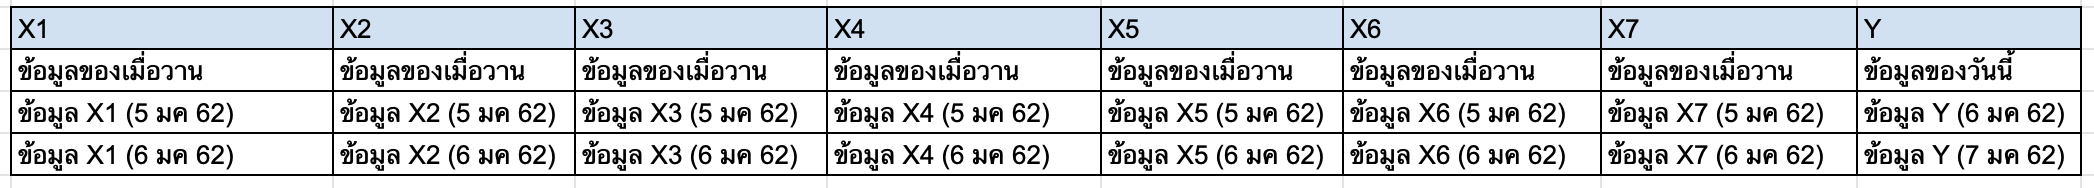

นำข้อมูลเข้า

In [54]:
import numpy as np

In [3]:
import pandas as pd
import os

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ความกด

In [9]:
data_ความกด_ขอนแก่น = pd.read_excel('/content/drive/MyDrive/mid/ความกดขอนแก่น.xlsx')

In [12]:
data_ความกด_นครพนม = pd.read_excel('/content/drive/MyDrive/mid/ความกดนครพนม.xlsx')

In [13]:
data_ความกด_สกลนคร = pd.read_excel('/content/drive/MyDrive/mid/ความกดสกลนคร.xlsx')

In [14]:
data_ความกด_หนองคาย = pd.read_excel('/content/drive/MyDrive/mid/ความกดหนองคาย.xlsx')

In [15]:
data_ความกด_เลย = pd.read_excel('/content/drive/MyDrive/mid/ความกดเลย.xlsx')

ความชื้น

In [16]:
data_ความชื้น_ขอนแก่น = pd.read_excel('/content/drive/MyDrive/mid/ความชื้นขอนแก่น.xlsx')

In [17]:
data_ความชื้น_นครพนม = pd.read_excel('/content/drive/MyDrive/mid/ความชื้นนครพนม.xlsx')

In [18]:
data_ความชื้น_สกลนคร = pd.read_excel('/content/drive/MyDrive/mid/ความชื้นสกลนคร.xlsx')

In [19]:
data_ความชื้น_หนองคาย = pd.read_excel('/content/drive/MyDrive/mid/ความชื้นหนองคาย.xlsx')

In [107]:
data_ความชื้น_เลย = pd.read_excel('/content/drive/MyDrive/mid/ความชื้นเลย.xlsx')

ลม

In [21]:
data_ลม_ขอนแก่น = pd.read_excel('/content/drive/MyDrive/mid/ลมขอนแก่น.xlsx')

In [22]:
data_ลม_นครพนม = pd.read_excel('/content/drive/MyDrive/mid/ลมนครพนม.xlsx')

In [23]:
data_ลม_สกลนคร = pd.read_excel('/content/drive/MyDrive/mid/ลมสกลนคร.xlsx')

In [24]:
data_ลม_หนองคาย = pd.read_excel('/content/drive/MyDrive/mid/ลมหนองคาย.xlsx')

In [25]:
data_ลม_เลย = pd.read_excel('/content/drive/MyDrive/mid/ลมเลย.xlsx')

เมฆ

In [26]:
data_เมฆ_ขอนแก่น = pd.read_excel('/content/drive/MyDrive/mid/เมฆขอนแก่น.xlsx')

In [27]:
data_เมฆ_นครพนม = pd.read_excel('/content/drive/MyDrive/mid/เมฆนครพนม.xlsx')

In [28]:
data_เมฆ_สกลนคร = pd.read_excel('/content/drive/MyDrive/mid/เมฆสกลนคร.xlsx')

In [29]:
data_เมฆ_หนองคาย = pd.read_excel('/content/drive/MyDrive/mid/เมฆหนองคาย.xlsx')

In [30]:
data_เมฆ_เลย = pd.read_excel('/content/drive/MyDrive/mid/เมฆเลย.xlsx')

ฝน

In [31]:
data_ฝน_ขอนแก่น = pd.read_excel('/content/drive/MyDrive/mid/ฝนขอนแก่น.xlsx')

In [32]:
data_ฝน_นครพนม = pd.read_excel('/content/drive/MyDrive/mid/ฝนนครพนม.xlsx')

In [33]:
data_ฝน_สกลนคร = pd.read_excel('/content/drive/MyDrive/mid/ฝนสกลนคร.xlsx')

In [34]:
data_ฝน_หนองคาย = pd.read_excel('/content/drive/MyDrive/mid/ฝนหนองคาย.xlsx')

In [35]:
data_ฝน_เลย = pd.read_excel('/content/drive/MyDrive/mid/ฝนเลย.xlsx')

น้ำค้าง

In [36]:
data_น้ำค้าง_ขอนแก่น = pd.read_excel('/content/drive/MyDrive/mid/น้ำค้างขอนแก่น.xlsx')

In [37]:
data_น้ำค้าง_นครพนม = pd.read_excel('/content/drive/MyDrive/mid/น้ำค้างนครพนม.xlsx')

In [38]:
data_น้ำค้าง_สกลนคร = pd.read_excel('/content/drive/MyDrive/mid/น้ำค้างสกลนคร.xlsx')

In [39]:
data_น้ำค้าง_หนองคาย = pd.read_excel('/content/drive/MyDrive/mid/น้ำค้างหนองคาย.xlsx')

In [40]:
data_น้ำค้าง_เลย = pd.read_excel('/content/drive/MyDrive/mid/น้ำค้างเลย.xlsx')

อุณหภูมิต่ำสุด

In [41]:
data_อุณหภูมิต่ำสุด_ขอนแก่น = pd.read_excel('/content/drive/MyDrive/mid/อุณหภูมิต่ำสุดขอนแก่น.xlsx')

In [42]:
data_อุณหภูมิต่ำสุด_นครพนม = pd.read_excel('/content/drive/MyDrive/mid/อุณหภูมิต่ำสุดนครพนม.xlsx')

In [43]:
data_อุณหภูมิต่ำสุด_สกลนคร = pd.read_excel('/content/drive/MyDrive/mid/อุณหภูมิต่ำสุดสกลนคร.xlsx')

In [44]:
data_อุณหภูมิต่ำสุด_หนองคาย = pd.read_excel('/content/drive/MyDrive/mid/อุณหภูมิต่ำสุดหนองคาย.xlsx')

In [45]:
data_อุณหภูมิต่ำสุด_เลย = pd.read_excel('/content/drive/MyDrive/mid/อุณหภูมิต่ำสุดเลย.xlsx')

ตุ้มแห้ง

In [46]:
data_ตุ้มแห้ง_ขอนแก่น = pd.read_excel('/content/drive/MyDrive/mid/ตุ้มแห้งขอนแก่น.xlsx')

In [47]:
data_ตุ้มแห้ง_นครพนม = pd.read_excel('/content/drive/MyDrive/mid/ตุ้มแห้งนครพนม.xlsx')

In [48]:
data_ตุ้มแห้ง_สกลนคร = pd.read_excel('/content/drive/MyDrive/mid/ตุ้มแห้งสกลนคร.xlsx')

In [49]:
data_ตุ้มแห้ง_หนองคาย = pd.read_excel('/content/drive/MyDrive/mid/ตุ้มแห้งหนองคาย.xlsx')

In [50]:
data_ตุ้มแห้ง_เลย = pd.read_excel('/content/drive/MyDrive/mid/ตุ้มแห้งเลย.xlsx')

head ความกด

In [97]:
data_ความกด_ขอนแก่น.head()

,ความกด(เปอร์เซ็นต์),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.ขอนแก่น,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.00,3.00,4.00,5.00,6.00,7.00,...,23.00,24.00,25.00,26.00,27.00,28.00,29,30,31,NaN
4,1,352201-หนองคาย จ.หนองคาย,2011-10-01 00:00:00,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645


In [98]:
data_ความกด_นครพนม.head()

,ความกด(เปอร์เซ็นต์),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.นครพนม,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.00,3.00,4.00,5.00,6.00,7.00,...,23.00,24.00,25.00,26.00,27.00,28.00,29,30,31,NaN
4,1,352201-หนองคาย จ.หนองคาย,2011-10-01 00:00:00,1006.3,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,...,1011.09,1010.64,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.28,1010.754839


In [99]:
data_ความกด_สกลนคร.head()

,ความกด(เปอร์เซ็นต์),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.สกลนคร,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.00,3.00,4.00,5.00,6.00,7.00,...,23.00,24.0,25.00,26.00,27.00,28.00,29,30,31,NaN
4,1,352201-หนองคาย จ.หนองคาย,2011-10-01 00:00:00,1005.84,1007.16,1007.87,1008.56,1010.55,1011.83,1011.24,...,1011.24,1010.8,1012.02,1012.36,1012.42,1012.97,1012.52,1011.87,1012.21,1010.772258


In [100]:
data_ความกด_หนองคาย.head()

,ความกด(เปอร์เซ็นต์),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.หนองคาย,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.00,3.00,4.00,5.00,6.00,7.00,...,23.00,24.00,25.00,26.00,27.0,28.00,29,30,31,NaN
4,1,352201-หนองคาย จ.หนองคาย,2011-10-01 00:00:00,1005.34,1006.67,1007.39,1008.11,1009.69,1011.55,1011.28,...,1011.01,1010.71,1011.67,1012.36,1012.5,1012.81,1011.88,1011.77,1012.18,1010.580645


In [101]:
data_ความกด_เลย.head()

,ความชื้นสัมพัทธ์(เปอร์เซ็นต์),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.เลย,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4.0,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29,30,31,NaN
4,1,353301-เลย สกษ. จ.เลย,2011-10-01 00:00:00,90,95.0,92.0,89.0,86.0,94.0,90.0,...,85.0,86.0,83.0,84.0,85.0,85.0,82,83,85,87


head ความชื้น

In [102]:
data_ความชื้น_ขอนแก่น.head()

,ความชื้นสัมพัทธ์(เปอร์เซ็นต์),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,จ.ขอนแก่น,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4.0,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29,30,31,NaN
4,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01 00:00:00,83,92.0,86.0,80.0,86.0,86.0,83.0,...,73.0,72.0,73.0,69.0,69.0,75.0,71,71,68,79


In [103]:
data_ความชื้น_นครพนม.head()

,ความชื้นสัมพัทธ์(เปอร์เซ็นต์),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,จ.นครพนม,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4.0,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29,30,31,NaN
4,1,357201-นครพนม จ.นครพนม,2011-10-01 00:00:00,95,84.0,74.0,72.0,87.0,88.0,81.0,...,66.0,67.0,70.0,69.0,71.0,66.0,72,70,69,77


In [104]:
data_ความชื้น_สกลนคร.head()

,ความชื้นสัมพัทธ์(เปอร์เซ็นต์),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4.0,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29,30,31,NaN
4,1,356201-สกลนคร จ.สกลนคร,2011-10-01 00:00:00,87,88.0,77.0,75.0,87.0,86.0,81.0,...,74.0,73.0,73.0,72.0,72.0,70.0,74,73,72,78


In [105]:
data_ความชื้น_หนองคาย.head()

,ความชื้นสัมพัทธ์(เปอร์เซ็นต์),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.หนองคาย,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4.0,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29,30,31,NaN
4,1,352201-หนองคาย จ.หนองคาย,2011-10-01 00:00:00,89,91.0,78.0,75.0,90.0,88.0,87.0,...,76.0,73.0,68.0,71.0,70.0,71.0,70,66,68,76


In [108]:
data_ความชื้น_เลย.head()

,ความชื้นสัมพัทธ์(เปอร์เซ็นต์),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.เลย,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4.0,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29,30,31,NaN
4,1,353301-เลย สกษ. จ.เลย,2011-10-01 00:00:00,90,95.0,92.0,89.0,86.0,94.0,90.0,...,85.0,86.0,83.0,84.0,85.0,85.0,82,83,85,87


head ลม

In [109]:
data_ลม_ขอนแก่น.head()

,ความเร็วลม(นอต),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.ขอนแก่น,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3,4.0,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29,30,31,NaN
4,1,353301-เลย สกษ. จ.เลย,2011-10-01 00:00:00,3,2.0,3,2.0,2.0,3.0,4.0,...,2.0,3.0,5.0,5.0,5.0,4.0,6,4,5,3.354839


In [110]:
data_ลม_นครพนม.head()

,ความเร็วลม(นอต),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.นครพนม,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4,5,6.0,7,...,23.0,24,25,26.0,27.0,28,29,30,31,NaN
4,1,353301-เลย สกษ. จ.เลย,2011-10-01 00:00:00,1,1.0,2.0,2,1,0.0,2,...,1.0,2,2,1.0,2.0,2,1,1,1,1.322581


In [111]:
data_ลม_สกลนคร.head()

,ความเร็วลม(นอต),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.สกลนคร,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29,30,31,NaN
4,1,353301-เลย สกษ. จ.เลย,2011-10-01 00:00:00,1,1.0,2.0,2,1.0,0.0,2.0,...,1.0,2.0,2.0,1.0,2.0,2.0,1,1,1,1.322581


In [112]:
data_ลม_หนองคาย.head()

,ความเร็วลม(นอต),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.หนองคาย,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29,30,31,NaN
4,1,353301-เลย สกษ. จ.เลย,2011-10-01 00:00:00,1,4.0,4.0,2,1.0,3.0,1.0,...,2.0,2.0,3.0,3.0,3.0,3.0,3,3,4,2.580645


In [113]:
data_ลม_เลย.head()

,ความเร็วลม(นอต),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.เลย,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4.0,5,6.0,7.0,...,23.0,24,25.0,26.0,27.0,28.0,29,30,31,NaN
4,1,353301-เลย สกษ. จ.เลย,2011-10-01 00:00:00,2,2.0,3.0,2.0,3,2.0,1.0,...,1.0,1,2.0,2.0,1.0,2.0,2,2,1,1.612903


head ลม

In [114]:
data_ลม_ขอนแก่น.head()

,ความเร็วลม(นอต),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.ขอนแก่น,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3,4.0,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29,30,31,NaN
4,1,353301-เลย สกษ. จ.เลย,2011-10-01 00:00:00,3,2.0,3,2.0,2.0,3.0,4.0,...,2.0,3.0,5.0,5.0,5.0,4.0,6,4,5,3.354839


In [115]:
data_ลม_นครพนม.head()

,ความเร็วลม(นอต),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.นครพนม,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4,5,6.0,7,...,23.0,24,25,26.0,27.0,28,29,30,31,NaN
4,1,353301-เลย สกษ. จ.เลย,2011-10-01 00:00:00,1,1.0,2.0,2,1,0.0,2,...,1.0,2,2,1.0,2.0,2,1,1,1,1.322581


In [116]:
data_ลม_สกลนคร.head()

,ความเร็วลม(นอต),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.สกลนคร,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29,30,31,NaN
4,1,353301-เลย สกษ. จ.เลย,2011-10-01 00:00:00,1,1.0,2.0,2,1.0,0.0,2.0,...,1.0,2.0,2.0,1.0,2.0,2.0,1,1,1,1.322581


In [118]:
data_ลม_หนองคาย.head()

,ความเร็วลม(นอต),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.หนองคาย,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29,30,31,NaN
4,1,353301-เลย สกษ. จ.เลย,2011-10-01 00:00:00,1,4.0,4.0,2,1.0,3.0,1.0,...,2.0,2.0,3.0,3.0,3.0,3.0,3,3,4,2.580645


In [117]:
data_ลม_เลย.head()

,ความเร็วลม(นอต),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.เลย,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4.0,5,6.0,7.0,...,23.0,24,25.0,26.0,27.0,28.0,29,30,31,NaN
4,1,353301-เลย สกษ. จ.เลย,2011-10-01 00:00:00,2,2.0,3.0,2.0,3,2.0,1.0,...,1.0,1,2.0,2.0,1.0,2.0,2,2,1,1.612903


head เมฆ

In [119]:
data_เมฆ_ขอนแก่น.head()

,จำนวนเมฆ(10ส่วน),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.ขอนแก่น,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3,4.0,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29,30,31,NaN
4,1,353301-เลย สกษ. จ.เลย,2011-10-01 00:00:00,9,10.0,10,8.0,10.0,10.0,10.0,...,2.0,3.0,5.0,3.0,3.0,5.0,4,2,2,6.322581


In [120]:
data_เมฆ_นครพนม.head()

,จำนวนเมฆ(10ส่วน),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.นครพนม,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2,3,4,5,6,7,...,23,24,25,26.0,27,28.0,29,30,31,NaN
4,1,353301-เลย สกษ. จ.เลย,2011-10-01 00:00:00,10,7,8,8,10,10,9,...,2,2,2,2.0,3,3.0,4,2,4,5.903226


In [121]:
data_เมฆ_สกลนคร.head()

,จำนวนเมฆ(10ส่วน),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.สกลนคร,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,NaN
4,1,353301-เลย สกษ. จ.เลย,2011-10-01 00:00:00,9,9,7,7,9,10,8,...,2,1,2,1,1,3,3,1,4,5.483871


In [122]:
data_เมฆ_หนองคาย.head()

,จำนวนเมฆ(10ส่วน),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.หนองคาย,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,NaN
4,1,353301-เลย สกษ. จ.เลย,2011-10-01 00:00:00,10,10,8,9,9,10,10,...,3,1,1,2,1,1,1,4,3,5.580645


เปลี่ยนหัวตาราง

In [51]:
data_ตุ้มแห้ง_เลย.isnull().any() #ตรวจสอบว่าข้อมูลไหนบ้างที่มี missing

อุณหภูมิตุ้มแห้ง(เซลเซียส)    True
Unnamed: 1                    True
Unnamed: 2                    True
Unnamed: 3                    True
Unnamed: 4                    True
Unnamed: 5                    True
Unnamed: 6                    True
Unnamed: 7                    True
Unnamed: 8                    True
Unnamed: 9                    True
Unnamed: 10                   True
Unnamed: 11                   True
Unnamed: 12                   True
Unnamed: 13                   True
Unnamed: 14                   True
Unnamed: 15                   True
Unnamed: 16                   True
Unnamed: 17                   True
Unnamed: 18                   True
Unnamed: 19                   True
Unnamed: 20                   True
Unnamed: 21                   True
Unnamed: 22                   True
Unnamed: 23                   True
Unnamed: 24                   True
Unnamed: 25                   True
Unnamed: 26                   True
Unnamed: 27                   True
Unnamed: 28         

In [61]:
data_ตุ้มแห้ง_เลย_drop = data_ตุ้มแห้ง_เลย.dropna()

In [62]:
100*((len(data_ตุ้มแห้ง_เลย)-len(data_ตุ้มแห้ง_เลย_drop))/len(data_ตุ้มแห้ง_เลย))

7.4074074074074066

In [63]:
data_ตุ้มแห้ง_เลย_drop.describe()

,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,24.356000,24.260000,24.388000,24.338000,24.320000,24.430000,24.498000,24.112000,24.002000,23.940000,...,24.062000,24.020000,24.116000,24.316000,24.566000,24.228000,24.190000,24.188000,24.132000,24.446000
std,2.572076,2.430252,2.226156,2.151401,2.382933,2.418656,2.511158,2.695699,2.768665,2.871819,...,2.909161,3.253256,2.938996,2.845717,2.826883,2.766346,3.250824,3.123096,2.967129,2.690437
min,16.800000,18.000000,19.100000,18.300000,17.200000,16.000000,15.800000,15.100000,16.800000,16.400000,...,15.900000,14.900000,15.600000,15.500000,14.600000,15.900000,12.000000,12.100000,13.900000,15.200000
25%,22.950000,22.975000,23.200000,23.075000,23.025000,23.600000,23.650000,23.225000,22.325000,22.025000,...,22.925000,22.200000,23.225000,23.625000,24.125000,23.375000,22.950000,23.300000,23.100000,22.975000
50%,24.750000,24.650000,24.550000,24.700000,25.000000,25.200000,25.300000,24.550000,24.350000,24.750000,...,25.100000,24.800000,24.600000,25.050000,25.200000,24.600000,24.800000,24.450000,24.500000,24.700000
75%,26.275000,25.950000,25.900000,25.900000,26.300000,25.900000,26.000000,25.975000,26.050000,26.300000,...,25.950000,26.675000,26.175000,26.150000,26.200000,25.875000,26.275000,26.175000,25.600000,26.400000
max,29.000000,29.100000,27.700000,27.500000,27.600000,27.800000,27.900000,28.100000,28.400000,28.800000,...,28.100000,28.900000,28.100000,27.900000,28.800000,29.800000,29.000000,28.400000,29.600000,29.000000


In [65]:
data_ตุ้มแห้ง_เลย_drop

,อุณหภูมิตุ้มแห้ง(เซลเซียส),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
4,1,353201-เลย จ.เลย,2011-10-01 00:00:00,26.3,25.1,24.4,25.2,25.6,23.7,24.6,...,25.8,26.1,26.1,26.2,25.9,25.6,26.3,25.6,24.8,25.6
5,2,353201-เลย จ.เลย,2011-11-01 00:00:00,25.3,24.7,24.5,24.4,24.9,25.4,25.8,...,26.3,23.6,22.9,23.3,24.5,24.1,25.5,25.5,-,24.4
6,3,353201-เลย จ.เลย,2011-12-01 00:00:00,23.9,22.9,21.0,20.9,22.3,21.6,23.8,...,21.8,19.8,16.6,16.4,17.6,21.1,22.7,22.6,23.2,21.1
7,1,353201-เลย จ.เลย,2012-01-01 00:00:00,22.7,22.9,24.1,24.3,23.3,23.0,22.2,...,25.2,24.4,23.5,22.8,23.4,24.9,25.5,23.5,23.5,23.3
8,2,353201-เลย จ.เลย,2012-02-01 00:00:00,23.4,24.2,23.2,24.0,25.6,26.3,25.9,...,25.5,25.9,26.9,26.8,26.5,26.7,26.7,-,-,25.4
9,3,353201-เลย จ.เลย,2012-10-01 00:00:00,26.4,26.9,25.3,25.9,26.6,26.3,26.3,...,26.9,26.4,27.2,26.8,27.4,27.4,27.9,27.9,27.4,26.8
10,4,353201-เลย จ.เลย,2012-11-01 00:00:00,26.1,25.3,26.2,26.2,26.9,27.3,27.8,...,27.4,25.8,26.3,26.6,25.6,25.2,25.8,26.7,-,26.7
11,5,353201-เลย จ.เลย,2012-12-01 00:00:00,27.6,27.6,25.8,26.6,26.4,25.4,24.9,...,24.6,21.4,21.4,23.0,24.6,24.4,24.6,24.4,20.3,24.5
12,6,353201-เลย จ.เลย,2013-01-01 00:00:00,19.5,22.2,23.8,23.2,22.2,21.6,21.8,...,24.4,25.3,24.6,25.0,23.1,22.0,23.6,24,21.5,22.9
13,7,353201-เลย จ.เลย,2013-02-01 00:00:00,22.3,23.4,23.8,25.9,25.9,26.9,27.4,...,25.2,24.7,26.1,28.4,29.6,29.0,-,-,-,26.4


In [66]:
data_ตุ้มแห้ง_หนองคาย

,อุณหภูมิตุ้มแห้ง(เซลเซียส),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,จ.หนองคาย,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.0,3.0,4.0,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29,30,31,NaN
4,1,352201-หนองคาย จ.หนองคาย,2011-10-01 00:00:00,26.7,25.5,27.0,26.8,24.9,24.3,25.4,...,27.7,27.9,28.0,27.8,27.8,27.4,27.2,27,27.2,27
5,2,352201-หนองคาย จ.หนองคาย,2011-11-01 00:00:00,26.3,26.4,26.3,26.5,27.1,27.4,28.3,...,26.8,23.9,23.9,25.2,25.6,26.0,25.7,25.8,-,25.9
6,3,352201-หนองคาย จ.หนองคาย,2011-12-01 00:00:00,25.6,23.6,21.4,21.9,23.2,24.7,24.9,...,22.5,20.9,17.0,17.4,19.8,22.8,23.9,24.6,23.5,22.1
7,1,352201-หนองคาย จ.หนองคาย,2012-01-01 00:00:00,23.4,23.9,25.1,24.3,20.7,22.8,22.8,...,24.6,23.0,23.2,21.8,24.3,25.8,25.9,24.9,22.4,23.8
8,2,352201-หนองคาย จ.หนองคาย,2012-02-01 00:00:00,24.1,24.6,21.7,23.9,26.1,27.7,27.4,...,27.2,27.4,27.4,28.3,25.8,25.5,26.9,-,-,25.6
9,3,352201-หนองคาย จ.หนองคาย,2012-10-01 00:00:00,27.7,28.3,29.2,28.0,27.5,27.3,27.2,...,27.9,28.0,28.6,28.6,28.0,28.6,29.3,29.5,27.7,28.4


In [67]:
data_ตุ้มแห้ง_หนองคาย_drop = data_ตุ้มแห้ง_หนองคาย.dropna()

In [68]:
100*((len(data_ตุ้มแห้ง_หนองคาย)-len(data_ตุ้มแห้ง_หนองคาย_drop))/len(data_ตุ้มแห้ง_หนองคาย))

6.779661016949152

In [69]:
data_ตุ้มแห้ง_หนองคาย_drop

,อุณหภูมิตุ้มแห้ง(เซลเซียส),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
4,1,352201-หนองคาย จ.หนองคาย,2011-10-01 00:00:00,26.7,25.5,27.0,26.8,24.9,24.3,25.4,...,27.7,27.9,28.0,27.8,27.8,27.4,27.2,27,27.2,27
5,2,352201-หนองคาย จ.หนองคาย,2011-11-01 00:00:00,26.3,26.4,26.3,26.5,27.1,27.4,28.3,...,26.8,23.9,23.9,25.2,25.6,26.0,25.7,25.8,-,25.9
6,3,352201-หนองคาย จ.หนองคาย,2011-12-01 00:00:00,25.6,23.6,21.4,21.9,23.2,24.7,24.9,...,22.5,20.9,17.0,17.4,19.8,22.8,23.9,24.6,23.5,22.1
7,1,352201-หนองคาย จ.หนองคาย,2012-01-01 00:00:00,23.4,23.9,25.1,24.3,20.7,22.8,22.8,...,24.6,23.0,23.2,21.8,24.3,25.8,25.9,24.9,22.4,23.8
8,2,352201-หนองคาย จ.หนองคาย,2012-02-01 00:00:00,24.1,24.6,21.7,23.9,26.1,27.7,27.4,...,27.2,27.4,27.4,28.3,25.8,25.5,26.9,-,-,25.6
9,3,352201-หนองคาย จ.หนองคาย,2012-10-01 00:00:00,27.7,28.3,29.2,28.0,27.5,27.3,27.2,...,27.9,28.0,28.6,28.6,28.0,28.6,29.3,29.5,27.7,28.4
10,4,352201-หนองคาย จ.หนองคาย,2012-11-01 00:00:00,25.9,26.2,27.0,28.3,28.5,28.3,29.0,...,30.0,27.7,26.4,28.0,27.1,27.5,26,28.1,-,28
11,5,352201-หนองคาย จ.หนองคาย,2012-12-01 00:00:00,29,29.0,27.9,26.6,27.2,24.3,24.9,...,23.8,21.0,21.9,23.9,25.8,25.9,25.6,24.4,19.5,25.4
12,6,352201-หนองคาย จ.หนองคาย,2013-01-01 00:00:00,19.8,22.9,24.6,23.5,23.4,22.9,23.3,...,25.1,25.8,25.7,25.6,22.6,21.2,23.3,24.7,21.9,23.4
13,7,352201-หนองคาย จ.หนองคาย,2013-02-01 00:00:00,22.7,23.8,24.3,25.7,26.7,27.8,28.6,...,24.4,25.0,27.4,29.3,30.4,30.7,-,-,-,26.9


In [77]:
data_ตุ้มแห้ง_หนองคาย_drop.head()

,อุณหภูมิตุ้มแห้ง(เซลเซียส),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
4,1,352201-หนองคาย จ.หนองคาย,2011-10-01 00:00:00,26.7,25.5,27.0,26.8,24.9,24.3,25.4,...,27.7,27.9,28.0,27.8,27.8,27.4,27.2,27,27.2,27
5,2,352201-หนองคาย จ.หนองคาย,2011-11-01 00:00:00,26.3,26.4,26.3,26.5,27.1,27.4,28.3,...,26.8,23.9,23.9,25.2,25.6,26.0,25.7,25.8,-,25.9
6,3,352201-หนองคาย จ.หนองคาย,2011-12-01 00:00:00,25.6,23.6,21.4,21.9,23.2,24.7,24.9,...,22.5,20.9,17.0,17.4,19.8,22.8,23.9,24.6,23.5,22.1
7,1,352201-หนองคาย จ.หนองคาย,2012-01-01 00:00:00,23.4,23.9,25.1,24.3,20.7,22.8,22.8,...,24.6,23.0,23.2,21.8,24.3,25.8,25.9,24.9,22.4,23.8
8,2,352201-หนองคาย จ.หนองคาย,2012-02-01 00:00:00,24.1,24.6,21.7,23.9,26.1,27.7,27.4,...,27.2,27.4,27.4,28.3,25.8,25.5,26.9,-,-,25.6


In [80]:
a={'Unnamed: 1':'สถานี','Unnamed: 2':'เดือนเเละปี','Unnamed: 34':'ค่าเฉลี่ย'}

In [ ]:
data_ตุ้มแห้ง_หนองคาย_drop=data_ตุ้มแห้ง_หนองคาย_drop.rename(columns=a) Dry_temp_NakhonPhanom = Dry_temp_NakhonPhanom.rename(columns=a) Dry_temp_Sakon = Dry_temp_Sakon.rename(columns=a)
Dry_temp_NongKhai = Dry_temp_NongKhai.rename(columns=a) Dry_temp_loei =Dry_temp_loei.rename(columns=a)

In [86]:
data_ตุ้มแห้ง_หนองคาย = data_ตุ้มแห้ง_หนองคาย.set_index(["อุณหภูมิตุ้มแห้ง(เซลเซียส)",'Unnamed: 1',"Unnamed: 2"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)','level_3':'DAY'})
data_ตุ้มแห้ง_ขอนแก่น = data_ตุ้มแห้ง_ขอนแก่น.set_index(["อุณหภูมิตุ้มแห้ง(เซลเซียส)",'Unnamed: 1',"Unnamed: 2"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)','level_3':'DAY'})
data_ตุ้มแห้ง_นครพนม = data_ตุ้มแห้ง_นครพนม.set_index(["อุณหภูมิตุ้มแห้ง(เซลเซียส)",'Unnamed: 1',"Unnamed: 2"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)','level_3':'DAY'})
data_ตุ้มแห้ง_สกลนคร = data_ตุ้มแห้ง_สกลนคร.set_index(["อุณหภูมิตุ้มแห้ง(เซลเซียส)",'Unnamed: 1',"Unnamed: 2"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)','level_3':'DAY'})
data_ตุ้มแห้ง_เลย = data_ตุ้มแห้ง_เลย.set_index(["อุณหภูมิตุ้มแห้ง(เซลเซียส)",'Unnamed: 1',"Unnamed: 2"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)','level_3':'DAY'})

NotImplementedError: > 1 ndim Categorical are not supported at this time

In [82]:
data_ตุ้มแห้ง_หนองคาย_drop.head()

,อุณหภูมิตุ้มแห้ง(เซลเซียส),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
4,1,352201-หนองคาย จ.หนองคาย,2011-10-01 00:00:00,26.7,25.5,27.0,26.8,24.9,24.3,25.4,...,27.7,27.9,28.0,27.8,27.8,27.4,27.2,27,27.2,27
5,2,352201-หนองคาย จ.หนองคาย,2011-11-01 00:00:00,26.3,26.4,26.3,26.5,27.1,27.4,28.3,...,26.8,23.9,23.9,25.2,25.6,26.0,25.7,25.8,-,25.9
6,3,352201-หนองคาย จ.หนองคาย,2011-12-01 00:00:00,25.6,23.6,21.4,21.9,23.2,24.7,24.9,...,22.5,20.9,17.0,17.4,19.8,22.8,23.9,24.6,23.5,22.1
7,1,352201-หนองคาย จ.หนองคาย,2012-01-01 00:00:00,23.4,23.9,25.1,24.3,20.7,22.8,22.8,...,24.6,23.0,23.2,21.8,24.3,25.8,25.9,24.9,22.4,23.8
8,2,352201-หนองคาย จ.หนองคาย,2012-02-01 00:00:00,24.1,24.6,21.7,23.9,26.1,27.7,27.4,...,27.2,27.4,27.4,28.3,25.8,25.5,26.9,-,-,25.6


In [70]:
data_ตุ้มแห้ง_หนองคาย_drop[data_ตุ้มแห้ง_หนองคาย_drop.duplicated(subset=['อุณหภูมิตุ้มแห้ง(เซลเซียส)'])]

,อุณหภูมิตุ้มแห้ง(เซลเซียส),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
7,1,352201-หนองคาย จ.หนองคาย,2012-01-01 00:00:00,23.4,23.9,25.1,24.3,20.7,22.8,22.8,...,24.6,23.0,23.2,21.8,24.3,25.8,25.9,24.9,22.4,23.8
8,2,352201-หนองคาย จ.หนองคาย,2012-02-01 00:00:00,24.1,24.6,21.7,23.9,26.1,27.7,27.4,...,27.2,27.4,27.4,28.3,25.8,25.5,26.9,-,-,25.6
9,3,352201-หนองคาย จ.หนองคาย,2012-10-01 00:00:00,27.7,28.3,29.2,28.0,27.5,27.3,27.2,...,27.9,28.0,28.6,28.6,28.0,28.6,29.3,29.5,27.7,28.4
57,1,352201-หนองคาย จ.หนองคาย,2022-01-01 00:00:00,23.6,23.8,23.1,23.4,24.4,24.7,24.3,...,23.5,24.9,25.8,26.2,26.1,25.9,26.5,26.1,25.6,24.5
58,2,352201-หนองคาย จ.หนองคาย,2022-02-01 00:00:00,23.5,22.7,23.5,24.1,21.2,22.2,25.3,...,20.6,20.3,20.7,22.7,23.8,25.4,-,-,-,23.7


In [71]:
data_ตุ้มแห้ง_หนองคาย = data_ตุ้มแห้ง_หนองคาย.drop_duplicates(subset='อุณหภูมิตุ้มแห้ง(เซลเซียส)',keep='last')

In [76]:
data_ตุ้มแห้ง_หนองคาย_drop.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง(เซลเซียส)','level_3':'DAY'})

KeyError: "None of ['เดือน', 'ปี', 'จังหวัด'] are in the columns"

In [74]:
data_ตุ้มแห้ง_เลย['Unnamed: 2'] = unit_df['project_id'].map(project_df.set_index('อุณหภูมิตุ้มแห้ง(เซลเซียส)')['Unnamed: 1']) Unnamed: 3

SyntaxError: invalid syntax (<ipython-input-74-cd3ae510af9a>, line 1)